# Importing Libraries

In [47]:
pip install wordcloud #installing necessery libaries

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np #for numerical operations and handling arrays
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for data visualization.
import seaborn as sns #for data visualization.
#for text preprocessing and natural language processing tasks
import re
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.stem import PorterStemmer
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
#for machine learning algorithms and data preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/preashanttimalsina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/preashanttimalsina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Exploration and Pre-processing

In [49]:
df = pd.read_csv('Downloads/amazon_reviews.csv') #read dataset
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [99]:
df.columns #columns in dataset
df.info() #Information about the dataset
df.describe() #more about dataset

<class 'pandas.core.frame.DataFrame'>
Index: 4499 entries, 0 to 4914
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewerName          4498 non-null   object        
 1   overall               4499 non-null   object        
 2   reviewText            4499 non-null   object        
 3   reviewTime            4499 non-null   datetime64[ns]
 4   day_diff              4499 non-null   int64         
 5   helpful_yes           4499 non-null   int64         
 6   helpful_no            4499 non-null   int64         
 7   total_vote            4499 non-null   int64         
 8   score_pos_neg_diff    4499 non-null   int64         
 9   score_average_rating  4499 non-null   float64       
 10  wilson_lower_bound    4499 non-null   float64       
 11  review_year           4499 non-null   int32         
 12  sentiment_score       4499 non-null   float64       
dtypes: datetime64[ns](1), f

,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,review_year,sentiment_score
count,4499,4499.000000,4499.0,4499.000000,4499.000000,4499.000000,4499.0,4.499000e+03,4499.000000,4499.000000
mean,2013-10-05 10:49:44.663258368,428.548789,0.0,0.039120,0.039120,-0.039120,0.0,6.492591e-20,2013.278284,0.261250
min,2012-01-09 00:00:00,1.000000,0.0,0.000000,0.000000,-3.000000,0.0,0.000000e+00,2012.000000,-1.000000
25%,2013-04-30 00:00:00,278.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,2013.000000,0.000000
50%,2013-10-12 00:00:00,422.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,2013.000000,0.225000
75%,2014-03-04 12:00:00,587.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,2014.000000,0.450000
max,2014-12-07 00:00:00,1064.000000,0.0,3.000000,3.000000,0.000000,0.0,4.868361e-17,2014.000000,1.000000
std,NaN,205.156487,0.0,0.235337,0.235337,0.235337,0.0,1.776883e-18,0.610707,0.294503


In [53]:
df.shape

(4915, 12)

In [54]:
df.isnull().sum() # Checking for missing values in the dataset

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [101]:
df.dropna(inplace=True)
print(df.isnull().sum())

reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
review_year             0
sentiment_score         0
dtype: int64


In [55]:
df.isnull().head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


# Handling Outliers such as 'helpful_yes' by using simple method using IQR.

In [57]:
# Handling Outliers such as 'helpful_yes' by using simple method using IQR.
Q1 = df['helpful_yes'].quantile(0.25)
Q3 = df['helpful_yes'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['helpful_yes'] < (Q1 - 1.5 * IQR)) |(df['helpful_yes'] > (Q3 + 1.5 * IQR)))]

In [58]:
if 'Unnamed: 0' in df.columns:  #Removing Redundant Columns (i.e., 'Unnamed: 0')
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [59]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "Positive"
    elif label == 3.0:
        return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "Negative"

In [60]:
df['overall'] = df["overall"].apply(sentiment)

In [61]:
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,Positive,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,0mie,Positive,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,Positive,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,Positive,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,Positive,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


<Axes: xlabel='overall'>

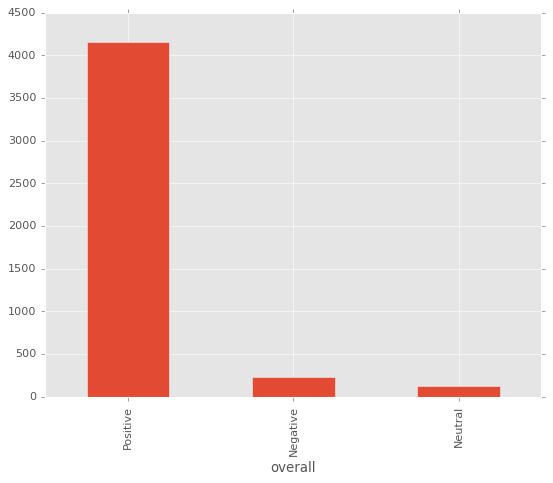

In [62]:
df.overall.value_counts().plot(kind = "bar")

In [63]:
df["reviewText"] = df["reviewText"].astype(str)
def toLower(text):
    return text.lower()

df["reviewText"] = df["reviewText"].apply(toLower)

In [64]:
nltk.download('punkt')
def data_preprocessing(text): #data pre-processing
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

df.reviewText = df['reviewText'].apply(data_preprocessing)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/preashanttimalsina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
df.reviewText.head(10)

0                                                issues
1     purchased device worked advertised never much ...
2     works expected sprung higher capacity think ma...
3     think worked greathad diff bran 64gb card went...
4     bought retail packaging arrived legit orange e...
5     mini storage doesnt anything else supposed pur...
6     phone never skips beat file transfers speedy c...
7     hard believe affordable digital become 32 gb d...
9     galaxy s4 super fast card totally happy happy ...
10    like sd card take music video downloads person...
Name: reviewText, dtype: object

In [66]:
stemmer = PorterStemmer()
def data_preprocessing_stem(text):
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    stem_words = [stemmer.stem(w) for w in filtered_text]
    return " ".join(stem_words)

In [67]:
df.reviewText = df['reviewText'].apply(data_preprocessing_stem)

In [68]:
df.reviewText.head(10)

0                                                  issu
1     purchas devic work advertis never much phone m...
2     work expect sprung higher capac think made bit...
3     think work greathad diff bran 64gb card went s...
4     bought retail packag arriv legit orang envelop...
5     mini storag doesnt anyth els suppos purchas ad...
6     phone never skip beat file transfer speedi cor...
7     hard believ afford digit becom 32 gb devic one...
9     galaxi s4 super fast card total happi happi st...
10    like sd card take music video download person ...
Name: reviewText, dtype: object

In [69]:
#  Lets drop the duplicate values

df = df.drop_duplicates('reviewText')

In [70]:
df.reviewText.head(10)

0                                                  issu
1     purchas devic work advertis never much phone m...
2     work expect sprung higher capac think made bit...
3     think work greathad diff bran 64gb card went s...
4     bought retail packag arriv legit orang envelop...
5     mini storag doesnt anyth els suppos purchas ad...
6     phone never skip beat file transfer speedi cor...
7     hard believ afford digit becom 32 gb devic one...
9     galaxi s4 super fast card total happi happi st...
10    like sd card take music video download person ...
Name: reviewText, dtype: object

In [71]:
print(df['reviewText'].iloc[0],'\n')
print(df['reviewText'].iloc[1],'\n')
print(df['reviewText'].iloc[2],'\n')

issu 

purchas devic work advertis never much phone memori sinc download lot stuff brainer 

work expect sprung higher capac think made bit cheesier earlier version paint look clean 



# Data Visualization**

Text(0.5, 1.0, 'Distribution of sentiments')

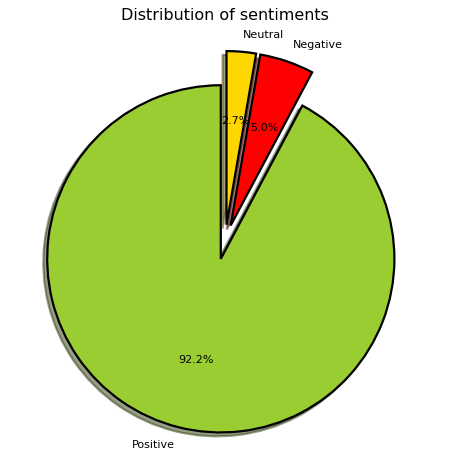

In [72]:
fig = plt.figure(figsize=(7,7))
colors = ('yellowgreen','red','gold')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['overall'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind = 'pie',autopct='%1.1f%%',shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of sentiments')


# feature engineering

In [73]:
#feature engineering
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['review_year'] = df['reviewTime'].dt.year

#new feature - Sentiment Score from reviewText
df['sentiment_score'] = df['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['reviewText']

0                                                    issu
1       purchas devic work advertis never much phone m...
2       work expect sprung higher capac think made bit...
3       think work greathad diff bran 64gb card went s...
4       bought retail packag arriv legit orang envelop...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspir 3 ...
4911    use extend capabl samsung galaxi note 10 great...
4912    great card fast reliabl come option adapt sd s...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing 64gb micro sd card crap we...
Name: reviewText, Length: 4499, dtype: object

In [74]:
pos_comments = df[df.overall == 'Positive']
pos_comments.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,review_year,sentiment_score
0,NaN,Positive,issu,2014-07-23,138,0,0,0,0,0.0,0.0,2014,0.000000
1,0mie,Positive,purchas devic work advertis never much phone m...,2013-10-25,409,0,0,0,0,0.0,0.0,2013,-0.100000
2,1K3,Positive,work expect sprung higher capac think made bit...,2012-12-23,715,0,0,0,0,0.0,0.0,2012,0.205556
3,1m2,Positive,think work greathad diff bran 64gb card went s...,2013-11-21,382,0,0,0,0,0.0,0.0,2013,0.000000
4,2&amp;1/2Men,Positive,bought retail packag arriv legit orang envelop...,2013-07-13,513,0,0,0,0,0.0,0.0,2013,0.400000


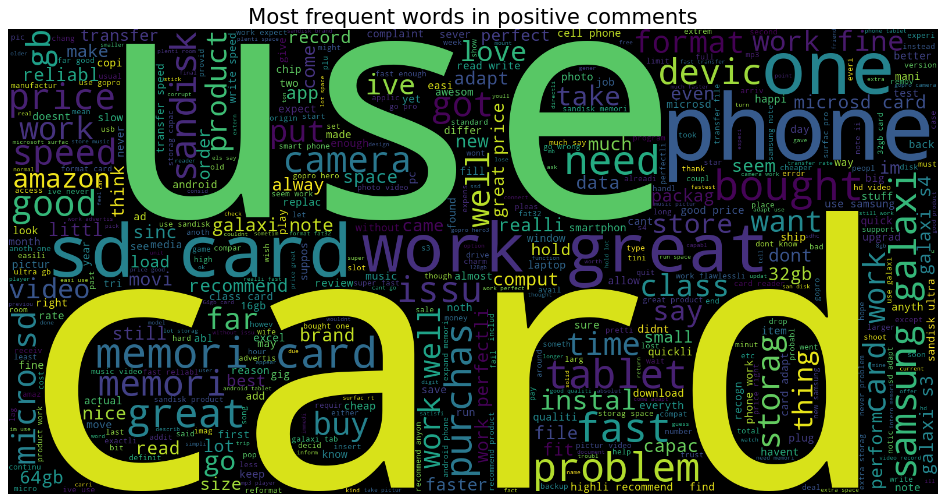

In [75]:
text = ' '.join([word for word in pos_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [76]:
neg_comments = df[df.overall == 'Negative']
neg_comments.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,review_year,sentiment_score
32,"Abdulrahman J. Alrashed ""dr34m3r""",Negative,bought 2 sandisk 32 gb microsd use galaxi note...,2013-03-08,640,0,0,0,0,0.0,0.0,2013,0.000000
38,Abraham Arturo Meza Marin,Negative,bougth micro sd card trubl got kingston tell s...,2013-02-19,657,0,0,0,0,0.0,0.0,2013,0.433766
43,"Abused Commuter ""abused_commuter""",Negative,order galaxi s3 last month broke access sever ...,2013-07-20,506,0,1,1,-1,0.0,0.0,2013,0.350000
49,Ace of Sevens,Negative,use month phone decid quit mount lost pictur p...,2014-01-31,311,0,0,0,0,0.0,0.0,2014,0.038258
108,Alan,Negative,work actual rw speed 188 mb even class 10 mark...,2014-03-25,258,0,0,0,0,0.0,0.0,2014,-0.068750


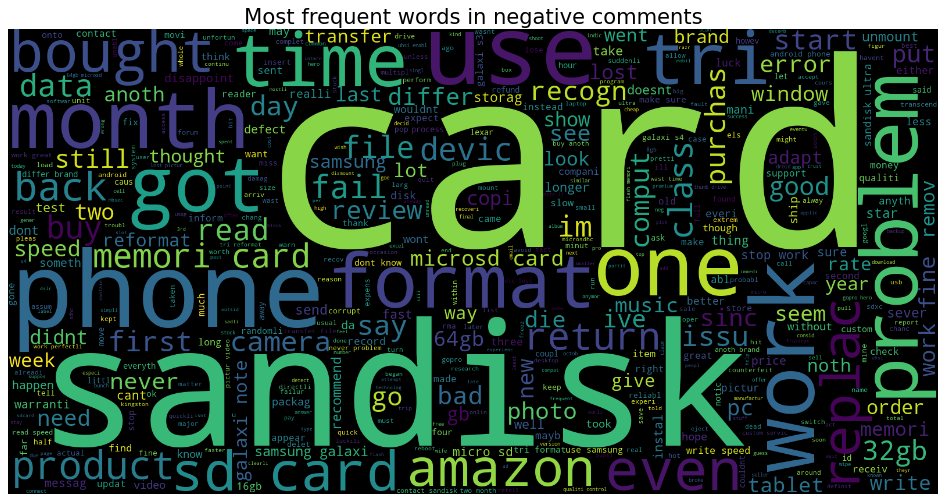

In [77]:
text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

In [78]:
neu_comments = df[df.overall == 'Neutral']
neu_comments.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,review_year,sentiment_score
11,98020,Neutral,work file write bit slower expect usb3 readera...,2013-11-20,383,0,0,0,0,0.0,0.0,2013,0.000000
112,Albert,Neutral,job fairli cheap worth return first one exchan...,2014-04-05,247,0,0,0,0,0.0,0.0,2014,0.302381
122,Alejandro Hernndez,Neutral,still dont feel fast phone guess need remov ru...,2014-03-02,281,0,0,0,0,0.0,0.0,2014,0.350000
163,Alton L Spencer,Neutral,work great galaxi s4until didnt work unknown r...,2014-05-27,195,0,0,0,0,0.0,0.0,2014,-0.025000
251,Amazon Customer,Neutral,keep short sweet potenti buyer look fact bsi t...,2013-07-02,524,0,0,0,0,0.0,0.0,2013,0.045247


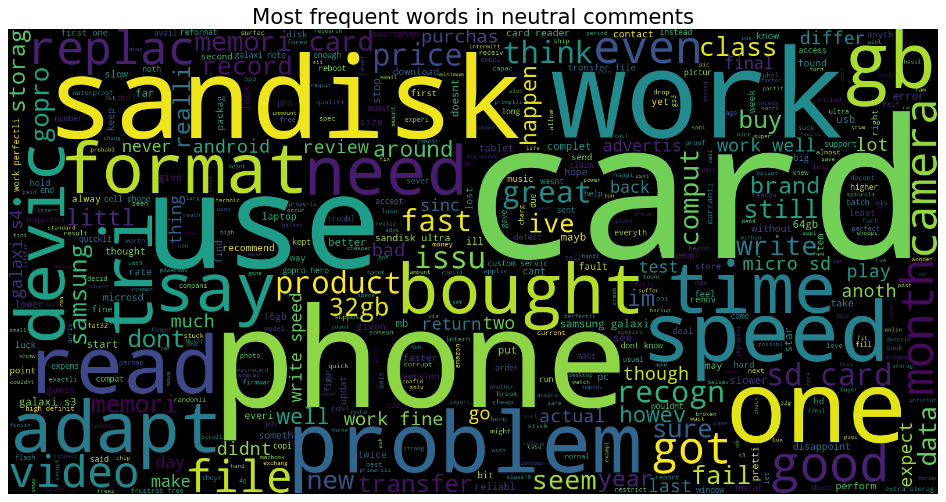

In [79]:
text = ' '.join([word for word in neu_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral comments', fontsize=19)
plt.show()

In [80]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['reviewText'])

In [81]:
feature_names = vect.get_feature_names_out()
print('Number of features: {}\n'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))

Number of features: 64344

First 20 features: 
['06nov2012' '06nov2012 bought' '074kread' '074kread 35' '075' '075 per'
 '0x80071ac3' '0x80071ac3 code' '10' '10 10mbsec' '10 15' '10 16'
 '10 16gb' '10 2013' '10 2014' '10 25' '10 32' '10 32gb' '10 32gbfastwork'
 '10 64']


In [82]:
X = df['reviewText']
Y = df['overall']
X = vect.transform(X)

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [84]:
print('Size of x_train:',(x_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(x_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (3599, 64344)
Size of y_train: (3599,)
Size of x_test: (900, 64344)
Size of y_test: (900,)


In [85]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print('Test accuracy : {:.2f}%'.format(logreg_acc*100))

Test accuracy : 92.67%


In [86]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[ 21   1  32]
 [  3   1  24]
 [  5   1 812]]


              precision    recall  f1-score   support

    Negative       0.72      0.39      0.51        54
     Neutral       0.33      0.04      0.06        28
    Positive       0.94      0.99      0.96       818

    accuracy                           0.93       900
   macro avg       0.66      0.47      0.51       900
weighted avg       0.90      0.93      0.91       900



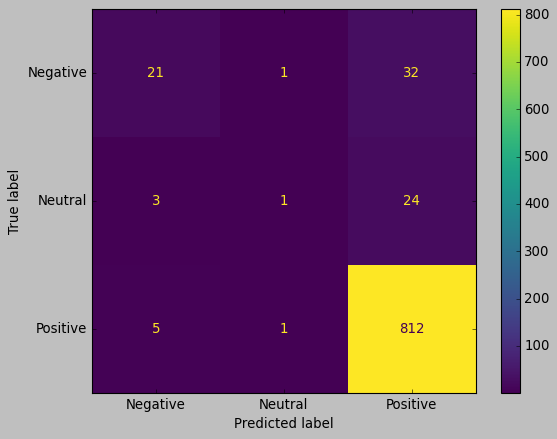

In [87]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()

In [88]:
param_grid = {'C':[0.001,0.01,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10]})

In [89]:
print("Best parameters : ", grid.best_params_)


Best parameters :  {'C': 10}


In [90]:
y_pred = grid.predict(x_test)

In [91]:
logreg_acc = accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 92.56%


In [102]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 22   1  31]
 [  4   1  23]
 [  6   2 810]]


              precision    recall  f1-score   support

    Negative       0.69      0.41      0.51        54
     Neutral       0.25      0.04      0.06        28
    Positive       0.94      0.99      0.96       818

    accuracy                           0.93       900
   macro avg       0.62      0.48      0.51       900
weighted avg       0.90      0.93      0.91       900



In [93]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train,y_train)

/Users/preashanttimalsina/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [94]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("test accuracy : {:.2f}%".format(svc_acc*100))

test accuracy : 92.44%


In [95]:
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[ 22   1  31]
 [  4   1  23]
 [  7   2 809]]


              precision    recall  f1-score   support

    Negative       0.67      0.41      0.51        54
     Neutral       0.25      0.04      0.06        28
    Positive       0.94      0.99      0.96       818

    accuracy                           0.92       900
   macro avg       0.62      0.48      0.51       900
weighted avg       0.90      0.92      0.91       900



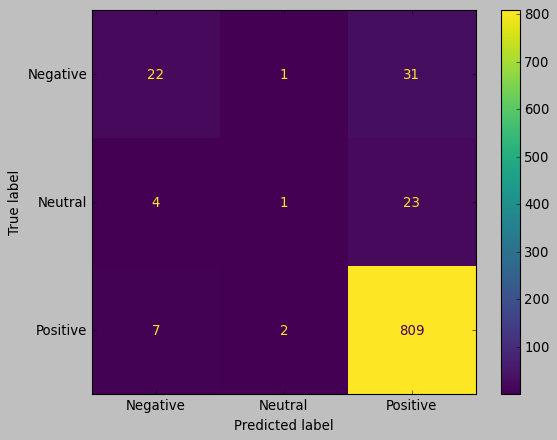

In [96]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels = SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVCmodel.classes_)
disp.plot()

In [97]:
pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/e9/07/63a6e890c9b998a6318b46c2a34377fd1a3e01a94c427d82bfb2472b7c16/streamlit-1.30.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for tzlocal<6,>=1.1 from https://files.pythonhosted.org/packages/97/3f/c4c51c55ff8487f2e6d0e618dba917e3c3ee2caae6cf0fbb59c9b1876f2e/tzlo

In [98]:

from joblib import dump, load
import streamlit as st

# Training code (example)
# ...
# model = train_model()


dump(SVCmodel, 'SVCmodel.joblib')

# Deployment code
st.title("Model Prediction")

# Load the trained model from the same Jupyter Notebook
loaded_model = load('SVCmodel.joblib')

# Create a function to make predictions
def make_prediction(input_data):
    return loaded_model.predict([input_data])

# Streamlit interface
input_feature = st.text_input("Enter the input for prediction:")

if st.button("Predict"):
    output = make_prediction(input_feature)
    st.success(f"The prediction is: {output[0]}")


2024-01-21 05:37:36.546 
  command:

    streamlit run /Users/preashanttimalsina/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
